In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [2]:
data = pd.read_csv ('inputs\digikala-orders.csv')
data.head (10)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,مشهد,1.0
6,8267421,5235886,42365,2017-08-19 13:30:24.000,55046.0,اصفهان,1.0
7,11588978,5574955,715680,2018-03-04 19:19:02.000,2790000.0,رشت,1.0
8,9916301,1145709,102588,2017-12-11 19:33:59.000,34862.0,تهران,1.0
9,10740652,4928230,658519,2018-01-23 06:11:34.000,2600000.0,خرمشهر,1.0


In [3]:
data ['DateTime_CartFinalize'] = pd.to_datetime (data['DateTime_CartFinalize'])
data ['Date'] = data['DateTime_CartFinalize'].map (lambda date : date.year * 100 + date.month)
data.head (10)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,Date
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605
5,11479246,2841640,312932,2018-03-01 12:07:15,290000.0,مشهد,1.0,201803
6,8267421,5235886,42365,2017-08-19 13:30:24,55046.0,اصفهان,1.0,201708
7,11588978,5574955,715680,2018-03-04 19:19:02,2790000.0,رشت,1.0,201803
8,9916301,1145709,102588,2017-12-11 19:33:59,34862.0,تهران,1.0,201712
9,10740652,4928230,658519,2018-01-23 06:11:34,2600000.0,خرمشهر,1.0,201801


Order count per month :

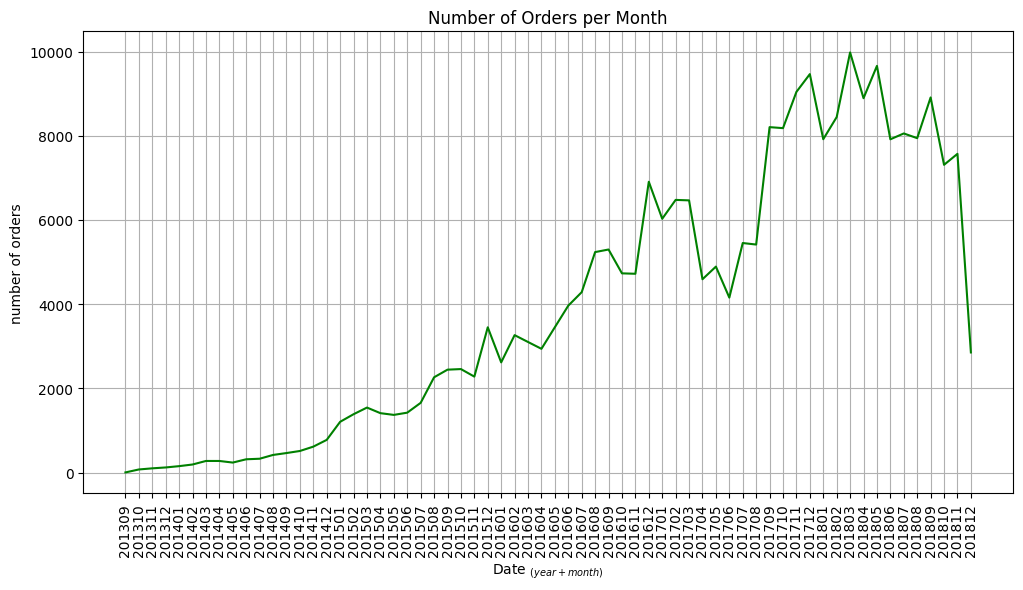

In [4]:
order = data.groupby ('Date')['Quantity_item'].sum().reset_index()

plt.figure (figsize = (12 , 6))
plt.plot ( order['Date'].to_numpy(dtype = str)
         , order['Quantity_item'].to_numpy()
         , color = 'green')
plt.title ('Number of Orders per Month')
plt.xlabel ('Date $_{(year+month)}$')
plt.ylabel ('number of orders')
plt.xticks(rotation='vertical')
plt.grid ()
plt.savefig ('outputs\output_3_number of orders.png')
plt.show ()

Customers count per city :

In [5]:
customer = data.groupby('city_name_fa')['ID_Customer'].nunique().reset_index()
customer_sort = customer.sort_values('ID_Customer' , ascending = False).reset_index(drop = True)

customer_no_other = customer_sort['ID_Customer'][7:].sum()

other = pd.DataFrame ([['سایر شهرها' , customer_no_other]] , columns = ['city_name_fa' , 'ID_Customer'])
final_tabel = pd.concat ([customer_sort.head(7) , other] , ignore_index = True)

final_tabel


,city_name_fa,ID_Customer
0,تهران,81048
1,کرج,4758
2,مشهد,4674
3,اصفهان,4664
4,اهواز,3353
5,شیراز,3076
6,رشت,2414
7,سایر شهرها,49722


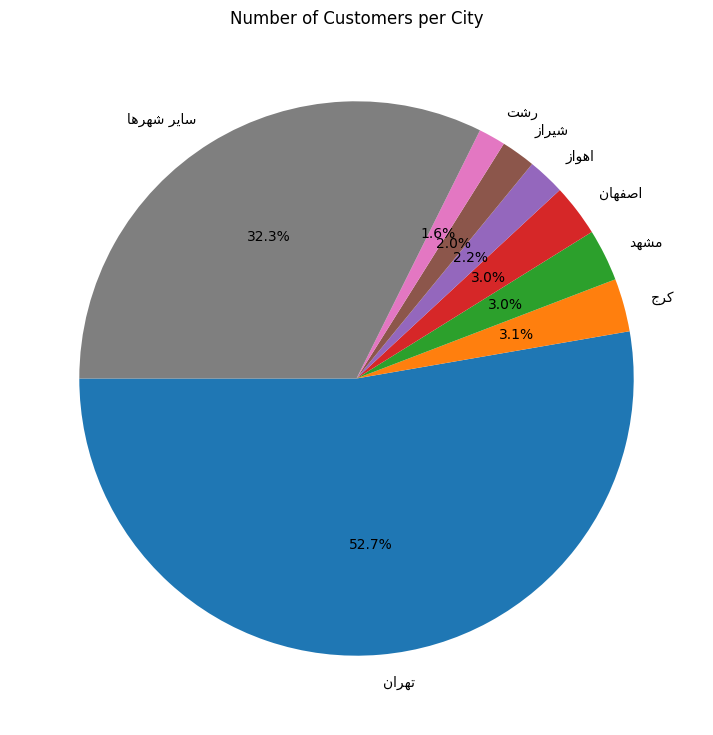

In [9]:
city_labels = [get_display (reshape(city)) for city in final_tabel['city_name_fa']]
plt.figure (figsize = (9 , 9))
plt.pie(final_tabel['ID_Customer'] , labels = city_labels , autopct='%1.1f%%', startangle=180)
plt.title ('Number of Customers per City')
plt.savefig ('outputs\output_3_number of customers.png')
plt.show()